In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Polynomial Regression
"""
y = a + bx + cx^2 + ... + nx^n + ...
"""

'\ny = a + bx + cx^2 + ... + nx^n + ...\n'

In [4]:
dataset = pd.read_csv('mydata/Position_Salaries.csv')
dataset.head(10)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [5]:
dataset = dataset.drop(['Position'], axis = True)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Level   10 non-null     int64
 1   Salary  10 non-null     int64
dtypes: int64(2)
memory usage: 288.0 bytes


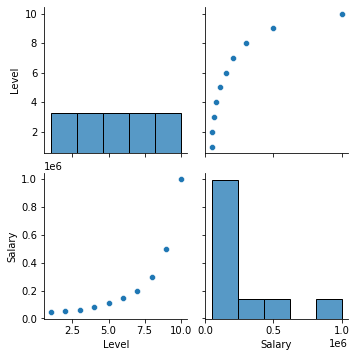

In [7]:
sns.pairplot(dataset)

In [8]:
X = dataset.drop(['Salary'], axis = True)
y = dataset['Salary']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8, 1), (2, 1), (8,), (2,))

In [11]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [12]:
print("Training Accuracy :", lin_reg.score(X_train, y_train))
print("Testing Accuracy :", lin_reg.score(X_test, y_test))

Training Accuracy : 0.6366049276570868
Testing Accuracy : 0.8451346684575975


In [13]:
#Poly Reg modelini eğitmek

In [14]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)
X_poly_test = poly_reg.transform(X_test)

In [15]:
print("Training Accuracy :", lin_reg_2.score(X_poly, y_train))
print("Testing Accuracy :", lin_reg_2.score(X_poly_test, y_test))

Training Accuracy : 0.9995857211026754
Testing Accuracy : 0.9714666803841844


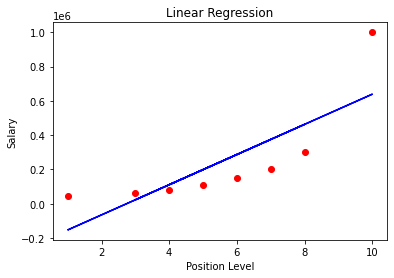

In [16]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, lin_reg.predict(X_train), color = 'blue')
plt.title('Linear Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

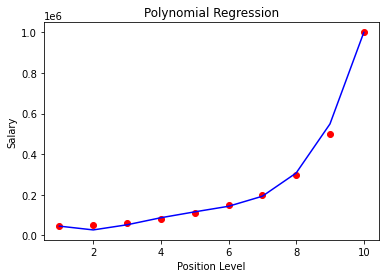

In [17]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [18]:
#Sınıflandırma - Logistic Regression

In [19]:
dataset = pd.read_csv('mydata/Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [20]:
X = dataset.drop(['Purchased', 'User ID', 'Gender'], axis = 1)
y = dataset['Purchased']

In [21]:
X.shape, y.shape

((400, 2), (400,))

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C = 1.0)
classifier.fit(X_train, y_train)

LogisticRegression()

In [25]:
y_pred = classifier.predict(X_test)

In [26]:
hesaplama = pd.DataFrame(np.c_[y_test, y_pred], columns = ['Original Purchased', 'Predicted Purchased'])
hesaplama

,Original Purchased,Predicted Purchased
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
95,1,0
96,0,0
97,1,0
98,1,1


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


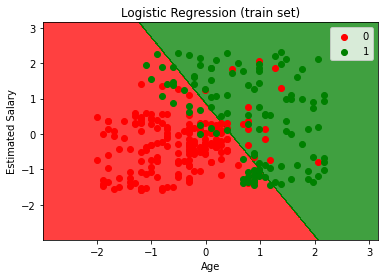

In [27]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01), 
                     np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
             plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red','green'))(i), label = j)
plt.title('Logistic Regression (train set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


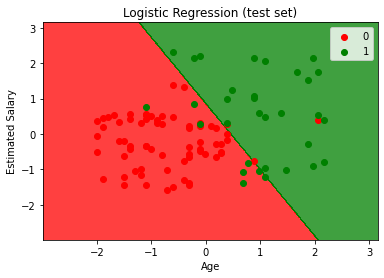

In [28]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01), 
                     np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
             plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red','green'))(i), label = j)
plt.title('Logistic Regression (test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [29]:
#ML Model Performance Metrics 
"""
Confusion Matrix, Accuracy, Precision, Recall, Specificity, F1-Score  
"""

'\nConfusion Matrix, Accuracy, Precision, Recall, Specificity, F1-Score  \n'

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[65  3]
 [ 8 24]]


In [31]:
#KNN (K-Nearest Neighbors) Algorithm

In [32]:
"""
non-parametric: verinin dağılımı ile alakalı hiçbir varsayımda bulunmamak
lazy algorithm: eğitim adımı yoktur, bütün veri noktaları yalnızca tahmin anında kullanılır
hem sınıflandırmada hem de regresyonda kullanılabilir
"""

'\nnon-parametric: verinin dağılımı ile alakalı hiçbir varsayımda bulunmamak\nlazy algorithm: eğitim adımı yoktur, bütün veri noktaları yalnızca tahmin anında kullanılır\nhem sınıflandırmada hem de regresyonda kullanılabilir\n'

In [33]:
#Elbow Method : Gerçek K değerini hesaplamak için kullanılır
"""
Mesafe metrikleri:
Euclidean distance : 
Manhattan distance :
Minkowski distance : 
Hamming distance : Large-Medium -> 1, Large-Large -> 0
"""

'\nMesafe metrikleri:\nEuclidean distance : \nManhattan distance :\nMinkowski distance : \nHamming distance : Large-Medium -> 1, Large-Large -> 0\n'

In [34]:
data = pd.read_csv('mydata/data_cleaned.csv')
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
